Preprocessing the data

#1 Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

# Replace 'path_to_dataset' with the actual path to your CSV file
path_to_dataset = 'weatherAUS.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(path_to_dataset)

In [2]:
#Exploring the data

# Display the first few rows of the DataFrame
print(df.head(10))

# Get information about the DataFrame
print(df.info())

# Basic statistics about the numerical columns
print(df.describe())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1     

In [3]:
#Meant to fill the information missing with a random sampling from a normal distrubution

def fill_missing_with_normal_distribution(column):
    mean = column.mean()
    std = column.std()
    size = column.isnull().sum()
    random_samples = np.random.normal(loc=mean, scale=std, size=size)
    column[column.isnull()] = random_samples
    return column

In [4]:
#Encode the columns that are not numbers but words
label_encoder = preprocessing.LabelEncoder() 
#I am dropping any of the instances where there isn't a prediction
df = df.dropna(subset=['RainTomorrow'])
#Coumns that need processing
columnsToProcess = ["Date", "Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]
for i in columnsToProcess:
    df[i]= label_encoder.fit_transform(df[i]) 

In [5]:
#These columns have missing information so I will fill them in
missingColumns = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustDir", "WindDir3pm", "Humidity9am", "WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainToday"]
for column in missingColumns:
    print(column)
    df[column] = fill_missing_with_normal_distribution(df[column])

df["RainTomorrow"] = df["RainTomorrow"].astype(int)

#Nomralize the data
for column in df.columns: 
    df[column] = df[column]  / df[column].abs().max()

#Making sure that there is no missing data
for i in df.columns:
    if df[i].isna().sum()>0:
        print(i, " has missing data")

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindDir3pm
Humidity9am
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday


C:\Users\jason\AppData\Local\Temp\ipykernel_5756\2400151476.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull()] = random_samples
C:\Users\jason\AppData\Local\Temp\ipykernel_5756\2400151476.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull()] = random_samples
C:\Users\jason\AppData\Local\Temp\ipykernel_5756\2400151476.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull(

In [6]:
#Splitting the data in answers and features

y = df["RainTomorrow"]
X = df.drop(columns=["RainTomorrow", "Temp9am", "WindGustDir", "Pressure9am"])
y = y.values
X = X.values


In [7]:
#Split into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#2 Feature Selection

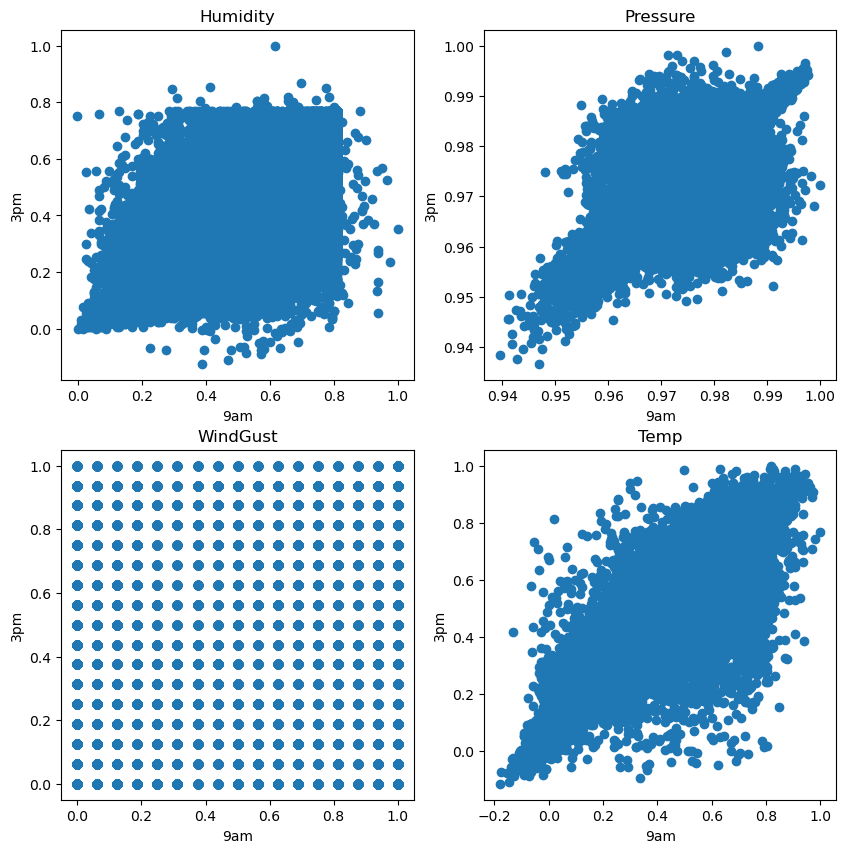

In [8]:
#xploring the data that I think may not be useful

figure, axis = plt.subplots(2, 2, figsize=(10,10)) 
axis[0,0].scatter(df.Humidity9am, df.Humidity3pm)
axis[0,0].set_xlabel('9am')
axis[0,0].set_ylabel('3pm')
axis[0,0].set_title('Humidity')


axis[0,1].scatter(df.Pressure9am, df.Pressure3pm)
axis[0,1].set_xlabel('9am')
axis[0,1].set_ylabel('3pm')
axis[0,1].set_title('Pressure')

axis[1,0].scatter(df.WindGustDir, df.WindDir3pm)
axis[1,0].set_xlabel('9am')
axis[1,0].set_ylabel('3pm')
axis[1,0].set_title('WindGust')

axis[1,1].scatter(df.Temp9am, df.Temp3pm)
axis[1,1].set_xlabel('9am')
axis[1,1].set_ylabel('3pm')
axis[1,1].set_title('Temp')
plt.show()



There are several features I believe are not very useful for telling if it is going to rain tommorow. I believe a lot of the data that has two observations, one at 9am and 3pm are more redudnant. They may provide a bit more but they aren't worth adding the extra feature. I will just take the 3pm as it is closer to the next day. Humditity seems to have more variances and so do clouds, but I can't imagine the clouds that are there at 9am having more of an impact than those at 4pm

C:\Users\jason\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jason\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jason\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure3pm'>

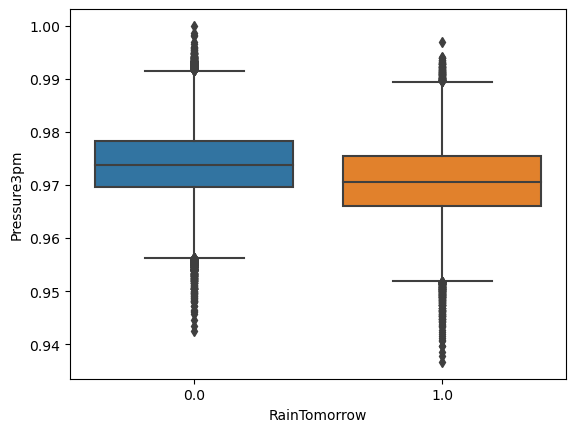

In [9]:
#Each box plot is meant to explore data I think might be useful
import seaborn as sns
sns.boxplot(x='RainTomorrow', y='Pressure3pm', data=df)

C:\Users\jason\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jason\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jason\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud3pm'>

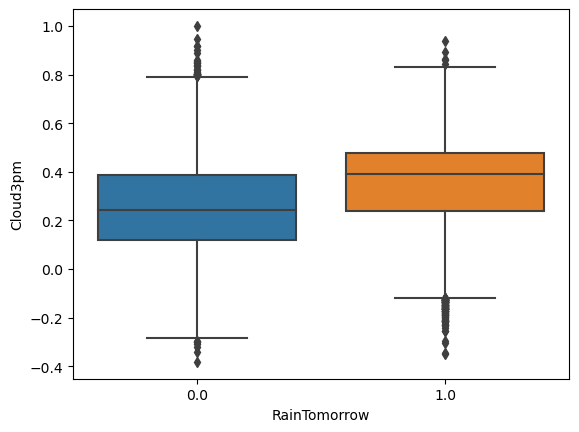

In [10]:
#Exploring some relationships using boxplots
sns.boxplot(x='RainTomorrow', y='Cloud3pm', data=df)

C:\Users\jason\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jason\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jason\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

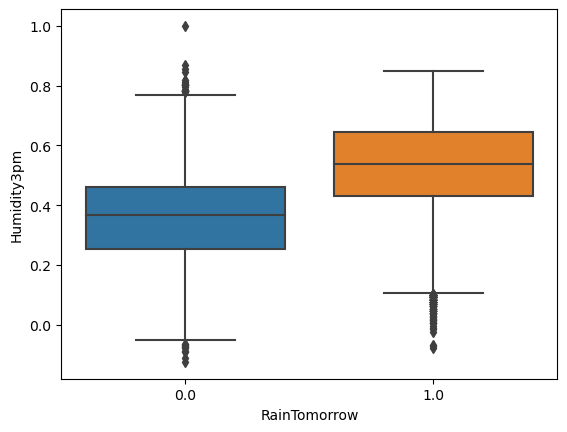

In [11]:
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)

Feature selection is important because it can help reduce overfitting in our neural network. Neural networks learn patterns very well and almost too well here so we would like to reduce the amount of data we give so it can be more flexible. It can also help lower the runtime and training time for the network as it deals with less features

#3 Model Building and #4 Model Training and Validation 

In [12]:
#Code from the video
class Model(nn.Module):
    def __init__(self, in_features = 19, h1 = 44, h2 = 44, out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))
        
        return x

In [13]:
model = Model()

In [14]:
# Converting X to float tensors
X_train=np.vstack(X_train).astype(float)

X_train = torch.from_numpy(X_train)
X_train = X_train.to(torch.float32)


X_test = torch.from_numpy(X_test)
X_test = X_test.to(torch.float32)

In [15]:
y_train= torch.from_numpy(y_train)
y_train = y_train.to(torch.long)
y_test= torch.from_numpy(y_test)
y_test = y_test.to(torch.long)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_fn = nn.MSELoss()


In [18]:
print(y_train)

tensor([0, 1, 0,  ..., 0, 1, 0])


In [19]:
#Train our model
# A epoch is a one run through our network

epochs = 200
losses = []
for i in range(epochs):
    # Go forward and get a predction
    y_pred = model.forward(X_train) #  Get Predicted Length
    
    loss = criterion(y_pred, y_train)
    
    losses.append(loss.detach().numpy())
    
    if i % 10 == 0:
        print(f'Epoch [{i+1}/{epochs}], Loss: {loss.item():.4f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch [1/200], Loss: 0.7594
Epoch [11/200], Loss: 0.7116
Epoch [21/200], Loss: 0.6931
Epoch [31/200], Loss: 0.6931
Epoch [41/200], Loss: 0.6931
Epoch [51/200], Loss: 0.6931
Epoch [61/200], Loss: 0.6931
Epoch [71/200], Loss: 0.6931
Epoch [81/200], Loss: 0.6931
Epoch [91/200], Loss: 0.6931
Epoch [101/200], Loss: 0.6931
Epoch [111/200], Loss: 0.6931
Epoch [121/200], Loss: 0.6931
Epoch [131/200], Loss: 0.6931
Epoch [141/200], Loss: 0.6931
Epoch [151/200], Loss: 0.6931
Epoch [161/200], Loss: 0.6931
Epoch [171/200], Loss: 0.6931
Epoch [181/200], Loss: 0.6931
Epoch [191/200], Loss: 0.6931


In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss/error")
plt.xlabel("epoch")

Tuning hyperparameters is important in neural networks as they allow the fine tuning of the neural network to be more efficent, more accurate, or better generalized. It can also 

#5 Model Evaluatoin

In [ ]:
from ISLP import confusion_table
from sklearn.metrics import confusion_matrix

with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
    # Print out a confusion matrix
    # Convert PyTorch tensors to NumPy arrays
    print(loss)

In [ ]:
correctDidRain = 0
correctDidntRain = 0
incorrectDidRain = 0
incorrectDidntRain = 0
total = 0;
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        total += 1
        predicted_class = y_val.argmax().item()
        if predicted_class == y_test[i]:
            if y_test[i] == 1:
                correctDidRain += 1
            else:
                correctDidntRain += 1
        else:
            if y_test[i] == 1:
                incorrectDidRain += 1
            else:
                incorrectDidntRain += 1
                
print("The model was correct and it did rain: ", correctDidRain)
print("The model was correct and it didn't rain: ", correctDidntRain)
print("The model was wrong and when it think it didn't rain but did: ", incorrectDidRain)
print("The model was wrong and when it thought it would rain it didn't: ", incorrectDidntRain)
print("Precision: ", correctDidRain/(correctDidRain+incorrectDidntRain))
print("Recall: ", correctDidRain/(correctDidRain+incorrectDidRain))

The model was good at predicting when it wouldn't rain and would get around half the times it would rain. The accuracy of it was at 67% and the recall was 49%. So our model could only guess it was gonna rain half the time. 

#6 Report and Interpretation

This was a challenging assignment for me. I used a video tutorial https://www.youtube.com/watch?v=rgBu8CbH9XY to help me code the neural network using pycharm and using some help from chatgpt to figure out how I should preprocess the data. I feel like there could be better ways for me to nomralize and preprocess the data but I didn't know to do that such as the method of using a machine learning algorithm to fill out missing data. Preprocessing was definitlely a challenge for me since there was a lot of different possible methods and I wasn't sure how to approach the problem. The hard part of the neural network was making the data I had working with the code that was shown in the video. I spent a lot of time googling errors to try and understand what was going wrong and how to fix it. 

The model overall isn't the best. It's only able to predict it will rain half the time, but it probably better than no model at all. I can probably spend more time looking at the feautures and preprocessing them better. Then I can also hypertune the parameters to try and see if I can get a better performance